In [66]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, plot_roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, plot_confusion_matrix
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import utils
import preprocessing

In [38]:
imputer = SimpleImputer(strategy='most_frequent')
df = utils.get_data()
df_imp = pd.DataFrame(imputer.fit_transform(df[['ganancia_perdida_declarada_bolsa_argentina', 'edad', 'rol_familiar_registrado', 'anios_estudiados']]))


In [39]:
X = df_imp
X = pd.get_dummies(X)
Y = df['tiene_alto_valor_adquisitivo']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=112)

In [40]:
scaler = MinMaxScaler(feature_range=(0,1))

X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [41]:
params = { 'n_estimators':range(100,501,100), 'learning_rate': np.linspace(0.1, 5, 10), 'algorithm': ('SAMME', 'SAMME.R') }
model = AdaBoostClassifier()

In [42]:
gscv = GridSearchCV(model, params, scoring='roc_auc', cv=4, n_jobs=-1, verbose=10)

In [43]:
%%time
gscv.fit(X_train, y_train)
score = roc_auc_score(y_test, gscv.predict_proba(X_test)[:,1])

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 17

CPU times: user 33 s, sys: 359 ms, total: 33.4 s
Wall time: 52min 58s


In [44]:
gscv.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.6444444444444445,
 'n_estimators': 300}

In [45]:
score

0.9188260257306489

In [46]:
print(classification_report(y_test,gscv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6182
           1       0.81      0.55      0.66      1959

    accuracy                           0.86      8141
   macro avg       0.84      0.76      0.78      8141
weighted avg       0.86      0.86      0.85      8141



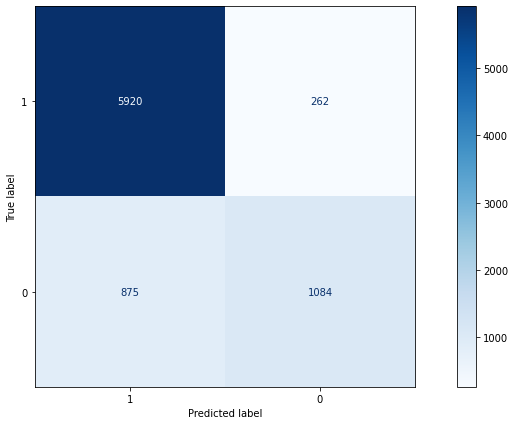

In [47]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(gscv, X_test, y_test, cmap=plt.cm.Blues, display_labels=['1', '0'], ax=ax)
plt.show()

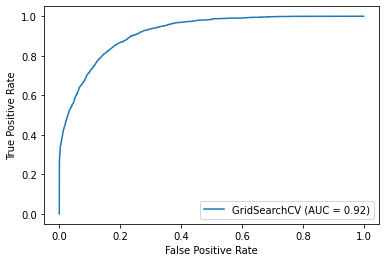

In [48]:
plot_roc_curve(gscv, X_test, y_test)

### AdaBoost con KNN

In [68]:
multinomialNB = MultinomialNB(alpha=0.1402805611222445)
model_nb = AdaBoostClassifier(base_estimator=multinomialNB)

In [69]:
gscv_nb = GridSearchCV(model_nb, params, scoring='roc_auc', cv=4, n_jobs=-1, verbose=10)

In [70]:
%%time
gscv_nb.fit(X_train, y_train)
score = roc_auc_score(y_test, gscv_nb.predict_proba(X_test)[:,1])

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 13

CPU times: user 2min 8s, sys: 54.8 s, total: 3min 3s
Wall time: 58min 54s


In [71]:
gscv_nb.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.6444444444444445,
 'n_estimators': 500}

In [72]:
score

0.9127565596177478

In [73]:
print(classification_report(y_test,gscv_nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6182
           1       0.79      0.55      0.65      1959

    accuracy                           0.86      8141
   macro avg       0.83      0.75      0.78      8141
weighted avg       0.85      0.86      0.85      8141



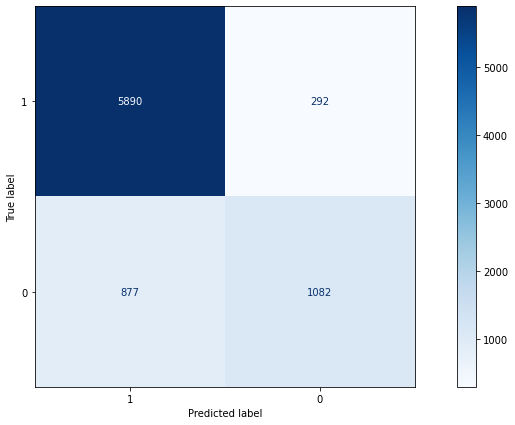

In [74]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(gscv_nb, X_test, y_test, cmap=plt.cm.Blues, display_labels=['1', '0'], ax=ax)
plt.show()

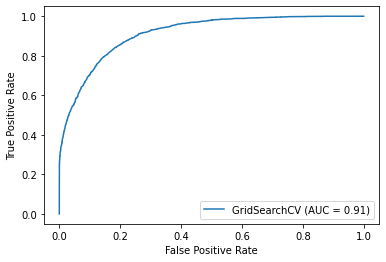

In [75]:
plot_roc_curve(gscv_nb, X_test, y_test)